In [ ]:
import numpy as np
import matplotlib.pyplot as plt

DELTA_T = 0.1  # Time interval in seconds
ANGLE_INCREMENT = np.radians(3)  # Angle increment in radians
MAX_ANGLE = np.radians(30)  # Maximum steering angle in radians
WHEELBASE = 2.36  # Wheelbase in meters
FRONT_WIDTH = 1.35 # Front wheel width in meters
WHEEL_RADIUS = 0.330  # Wheel radius in meters
LANE_WIDTH = 3.5  # Lane width in meters
FUTURE_LOOK_AHEAD = 2 # Future look ahead in seconds

car_position = np.array([0,0])
def display_corners_car(thetas = np.pi/2):
        corners = []
        for theta in [thetas, thetas + np.pi]:
            x = car_position[0] +FRONT_WIDTH/2 * np.sin(theta) + WHEELBASE/2 * np.cos(theta)
            y = car_position[1] +WHEELBASE/2 * np.sin(theta) - FRONT_WIDTH/2 * np.cos(theta)
            corners.append(np.array([x, y]))
            x = car_position[0] - FRONT_WIDTH/2 * np.sin(theta) + WHEELBASE/2 * np.cos(theta)
            y = car_position[1] + WHEELBASE/2 * np.sin(theta) + FRONT_WIDTH/2 * np.cos(theta)
            corners.append(np.array([x, y]))
        return np.array(corners)

corners = display_corners_car()

plt.scatter(corners[0,0],corners[0,1], s= 30, c='r')

plt.scatter(corners[1,0],corners[1,1], s= 30, c='b')

plt.scatter(corners[2,0],corners[2,1], s= 30, c='g')

plt.scatter(corners[3,0],corners[3,1], s= 30, c='y')



# corners = display_corners_car(np.pi/2 + np.pi/8)
# plt.scatter(corners[:,0],corners[:,1], s= 30)
# corners = display_corners_car(np.pi/2 - np.pi/8)
# plt.scatter(corners[:,0],corners[:,1], s= 30)
# corners = display_corners_car(np.pi/2 + np.pi/4)
# plt.scatter(corners[:,0],corners[:,1], s= 30)
# corners = display_corners_car(np.pi/2 - np.pi/4)
# plt.scatter(corners[:,0],corners[:,1], s= 30)
plt.xlim(-2,2)
plt.ylim(-2,2)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
LANE_WIDTH = 3.5
length_curve = 62.8
y = np.linspace(0,length_curve,100) 
plt.plot([0, 0], [-40, 0], 'k--', label='Lane Limit')
plt.plot([LANE_WIDTH, LANE_WIDTH], [-40, 0], 'k--')
x = 0.3 * np.sin(y/10)
plt.plot(x, y, label='Lane Center')
plt.plot(x + LANE_WIDTH, y)
plt.plot([0, 0], [length_curve, length_curve+40], 'k--', label='Lane Limit')
plt.plot([LANE_WIDTH, LANE_WIDTH], [length_curve, length_curve+40], 'k--')
#plt.xlim(- 5, + 5)
plt.ylim(length_curve - 2, length_curve + 2)
plt.legend(loc='upper left') 
plt.show()

In [ ]:
sum(abs(x) for x in [-3,-1,1])

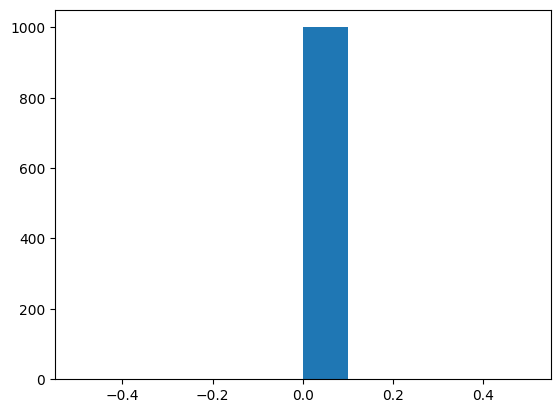

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#a = np.ones(1000)
noise = np.random.normal(0, 0.0, 1000)
#plot(a + noise)
plt.hist(noise)
plt.show()

In [39]:
def distance_to_lane(Front_left, Front_right, x_curve, y_curve): 
    # LEFT
    idx = np.argmin(np.abs(y_curve - Front_left[1]))
    idx_min = max(idx - 8, 0)
    idx_max = min(idx + 8, len(x_curve))

    points = np.column_stack((x_curve[idx_min:idx_max], y_curve[idx_min:idx_max]))
    distance_left = (np.min(np.linalg.norm(points - Front_left, axis=1)))


    idx = np.argmin(np.abs(y_curve - Front_right[1]))
    idx_min = max(idx - 8, 0)
    idx_max = min(idx + 8, len(x_curve))
    # Stack curve points
    points = np.column_stack((x_curve[idx_min:idx_max] + LANE_WIDTH, y_curve[idx_min:idx_max]))
    distance_right = (np.min(np.linalg.norm(points - Front_right, axis=1)))
    
    return distance_left, distance_right

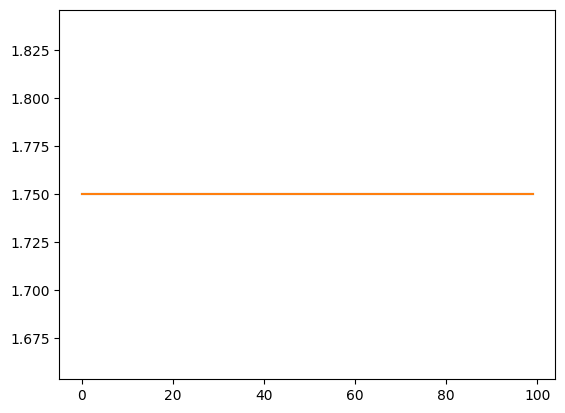

In [40]:
#MAP SAVE IN NUMPY
LANE_WIDTH = 3.5  # Lane width in meters
LENGTH_CURVE = 62.8
import matplotlib.pyplot as plt
# self.y_curve = np.linspace(0,LENGTH_CURVE, 100)
# self.x_curve = 1 * np.sin(self.y_curve/10)
# self.ax1.plot([LANE_WIDTH, LANE_WIDTH], [-40, 0], 'k--')
# self.ax1.plot(self.x_curve + LANE_WIDTH, self.y_curve, 'r--')
# self.ax1.plot([LANE_WIDTH, LANE_WIDTH], [LENGTH_CURVE, LENGTH_CURVE+40], 'k--')
# self.ax1.plot([0, 0], [-40, 0], 'k--', label='Lane Limit')
# self.ax1.plot(self.x_curve, self.y_curve, 'r--')
# self.ax1.plot([0, 0], [LENGTH_CURVE, LENGTH_CURVE+40], 'k--')

y_curve = np.linspace(0,LENGTH_CURVE, 100)
x_curve = 1 * np.sin(y_curve/10)
a = np.stack([x_curve, y_curve], axis=1)
b = np.stack([x_curve + LANE_WIDTH, y_curve], axis=1)
c = np.stack([x_curve + LANE_WIDTH/2, y_curve], axis=1)
dist = []
for Front_left, Front_right in zip(c,c):
    dist.append(distance_to_lane(Front_left, Front_right, x_curve, y_curve))
dist = np.array(dist)
plt.plot(np.arange(len(dist)), dist[:,0])
plt.plot(np.arange(len(dist)), dist[:,1])

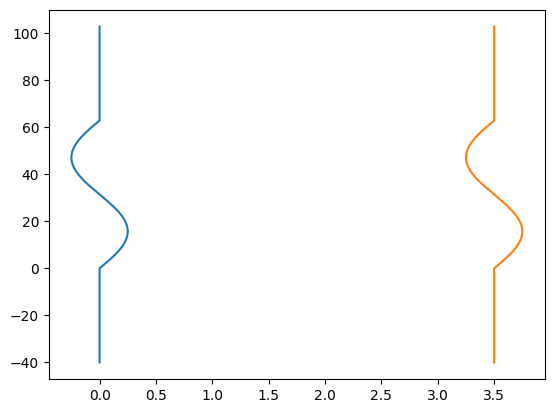

In [50]:
plt.plot(x_trajectory, y_trajectory)
plt.plot(x_trajectory + LANE_WIDTH, y_trajectory)

In [1]:
dx = self.velocity * np.cos(self.theta) * np.cos(self.phi)
dy = self.velocity * np.sin(self.theta) * np.cos(self.phi)
dtheta = self.velocity * np.sin(self.phi)/self.wheelbase

delta_x = dx * DELTA_T
delta_y = dy * DELTA_T
theta = theta + dtheta * DELTA_T  
x = x + delta_x
y = y + delta_y

NameError: name 'self' is not defined